Data Science Fundamentals: R |
[Table of Contents](../index.ipynb)
- - - 
<!--NAVIGATION-->
Module 15. [tidyverse](./00.ipynb) | [R Markdown](./01.ipynb) | [R + Shiny App](./02.ipynb) | [Basic Visualization](./03.ipynb) | [Tibbles](./04.ipynb)  | [ggplot2](./05.ipynb) | [Statistical Transformations](./06.ipynb) | [Exercises](./07.ipynb)

![images](images/slides17.png)

# Exercises

The [original exercises and data](http://rstudio-pubs-static.s3.amazonaws.com/284329_c7e660636fec4a42a09eed968dc47f32.html) for all the exercises is also available locally here ```./dataSets/EconomistData.csv```

In [8]:
library(tidyverse)
library(readr)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v purrr   0.3.2       v forcats 0.4.0  
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [3]:
dat <- read_csv("./dataSets/EconomistData.csv")

Parsed with column specification:
cols(
  Country = col_character(),
  HDI.Rank = col_double(),
  HDI = col_double(),
  CPI = col_double(),
  Region = col_character()
)


In [4]:
dat$Region <- factor(dat$Region,
                     levels = c("EU W. Europe",
                                "Americas",
                                "Asia Pacific",
                                "East EU Cemt Asia",
                                "MENA",
                                "SSA"),
                     labels = c("OECD",
                                "Americas",
                                "Asia &\nOceania",
                                "Central &\nEastern Europe",
                                "Middle East &\nnorth Africa",
                                "Sub-Saharan\nAfrica"))

In [7]:
head(dat)

Country,HDI.Rank,HDI,CPI,Region
Afghanistan,172,0.398,1.5,Asia & Oceania
Albania,70,0.739,3.1,Central & Eastern Europe
Algeria,96,0.698,2.9,Middle East & north Africa
Angola,148,0.486,2.0,Sub-Saharan Africa
Argentina,45,0.797,3.0,Americas
Armenia,86,0.716,2.6,Central & Eastern Europe


### Exercise 1. 

These data consist of Human Development Index and Corruption Perception Index scores for several countries.

- A. Create a scatter plot with CPI on the x axis and HDI on the y axis.
- B. Color the points blue.
- C. Map the color of the the points to Region.
- D. Make the points bigger by setting size to 2
- E. Map the size of the points to HDI.Rank

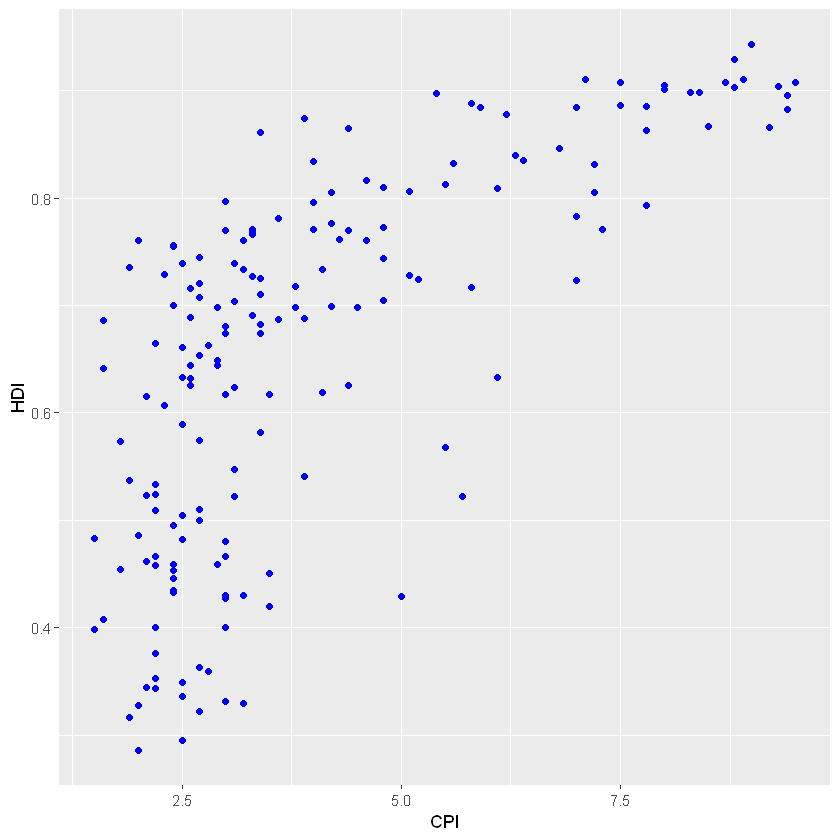

In [18]:
#A. Create a scatter plot with CPI on the x axis and HDI on the y axis.
#B. Color the points blue.
ggplot(dat, aes(x=CPI, y=HDI)) + geom_point(color="blue")

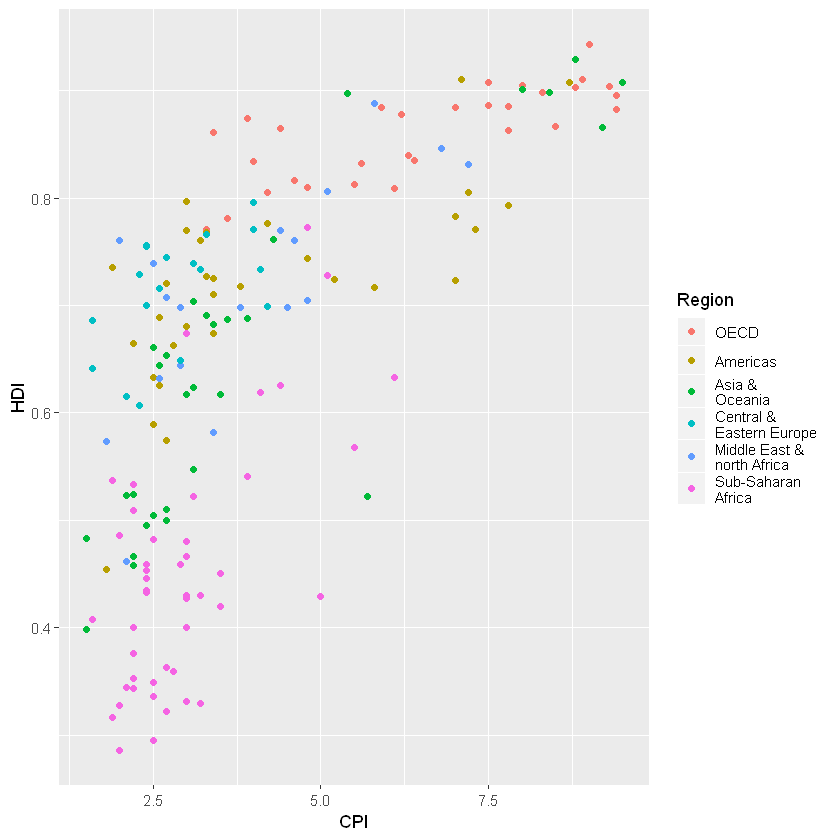

In [19]:
#- C. Map the color of the the points to Region.
ggplot(dat, aes(x=CPI, y=HDI, color=Region)) + geom_point()

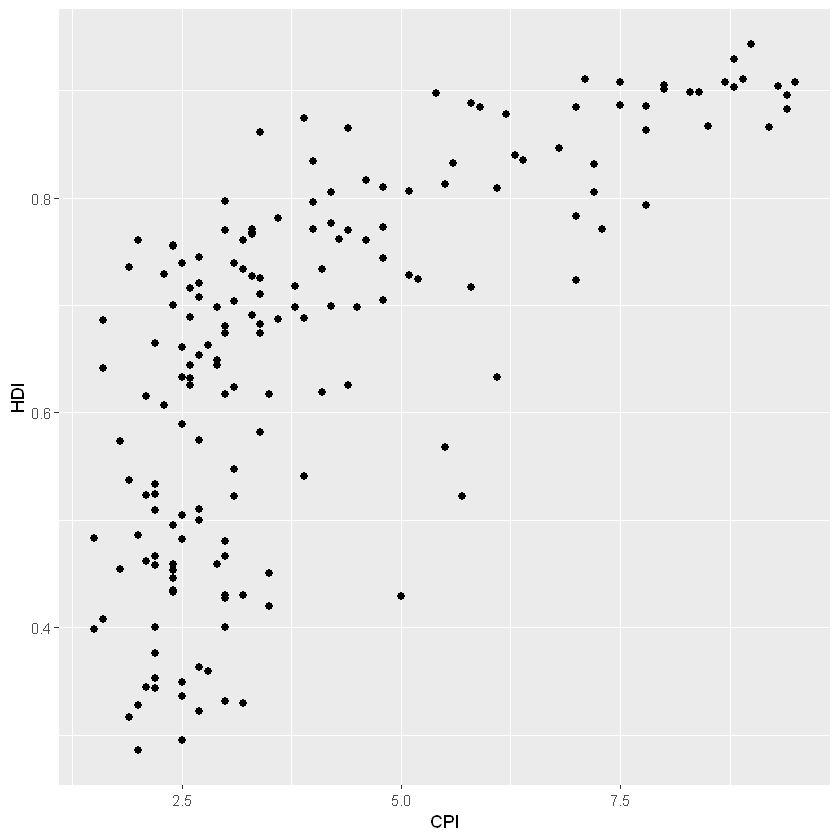

In [20]:
#- D. Make the points bigger by setting size to 2
ggplot(dat, aes(x=CPI, y=HDI)) + geom_point(size=2)

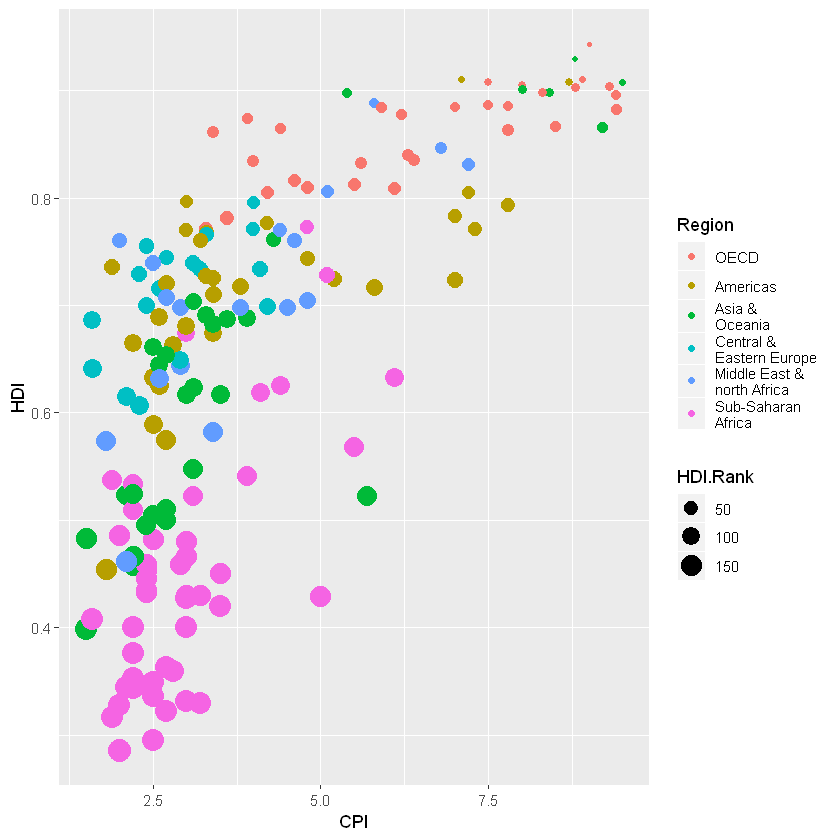

In [22]:
#- E. Map the size of the points to HDI.Rank
ggplot(dat, aes(x=CPI, y=HDI, color=Region, size=HDI.Rank)) + geom_point()

### Exercise 2. 

- A. Re-create a scatter plot with CPI on the x axis and HDI on the y axis (as you did in the previous exercise).
- B. Overlay a smoothing line on top of the scatter plot using ```geom_smooth```.
- C. Overlay a smoothing line on top of the scatter plot using ```geom_smooth```, but use a linear model for the predictions. Hint: see ```?stat_smooth```.
- D. Overlay a smoothing line on top of the scatter plot using ```geom_line```. Hint: change the statistical transformation.

- **BONUS**: Overlay a smoothing line on top of the scatter plot using the default loess method, but make it less smooth. Hint: see ```?loess```.

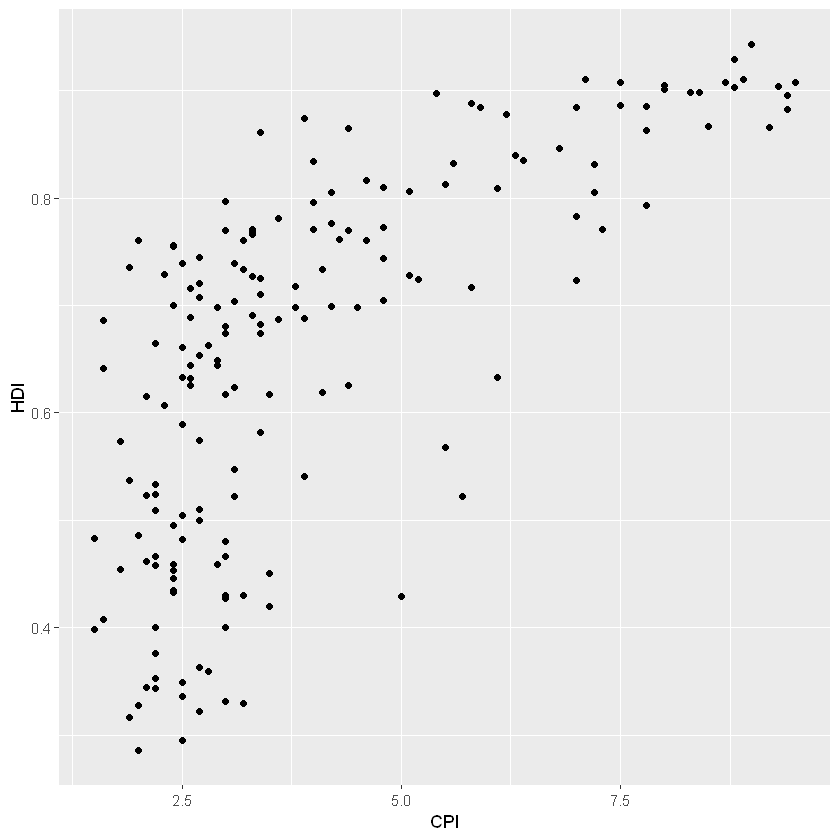

In [23]:
#A. Re-create a scatter plot with CPI on the x axis and HDI on the y axis (as you did in the previous exercise).
ggplot(dat, aes(x=CPI, y=HDI)) + geom_point()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


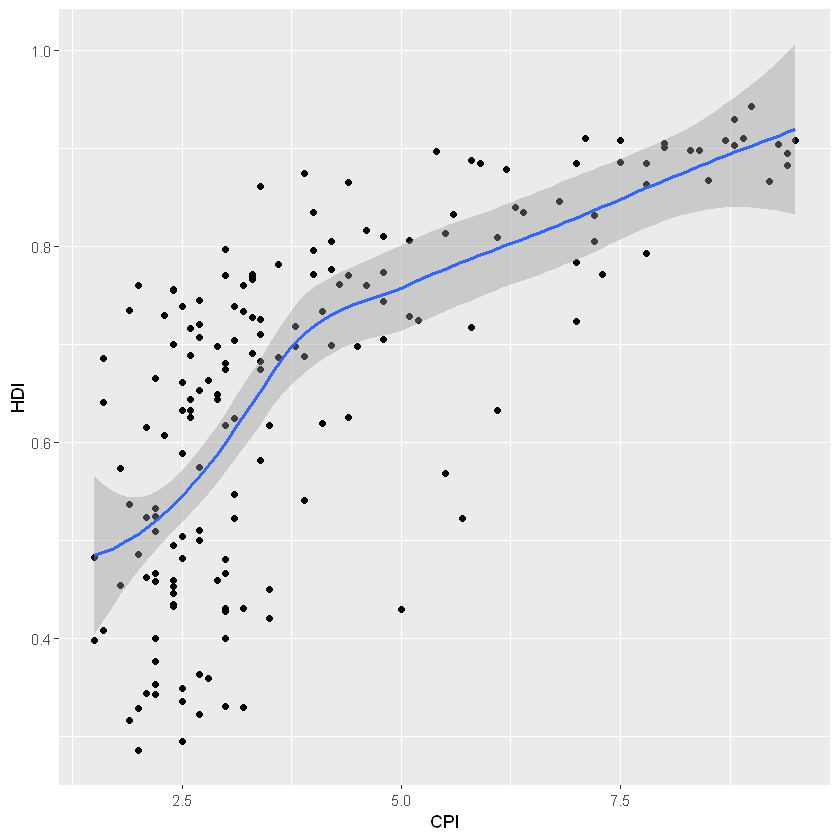

In [24]:
#B. Overlay a smoothing line on top of the scatter plot using geom_smooth.
ggplot(dat, aes(x=CPI, y=HDI)) + geom_point() + geom_smooth()

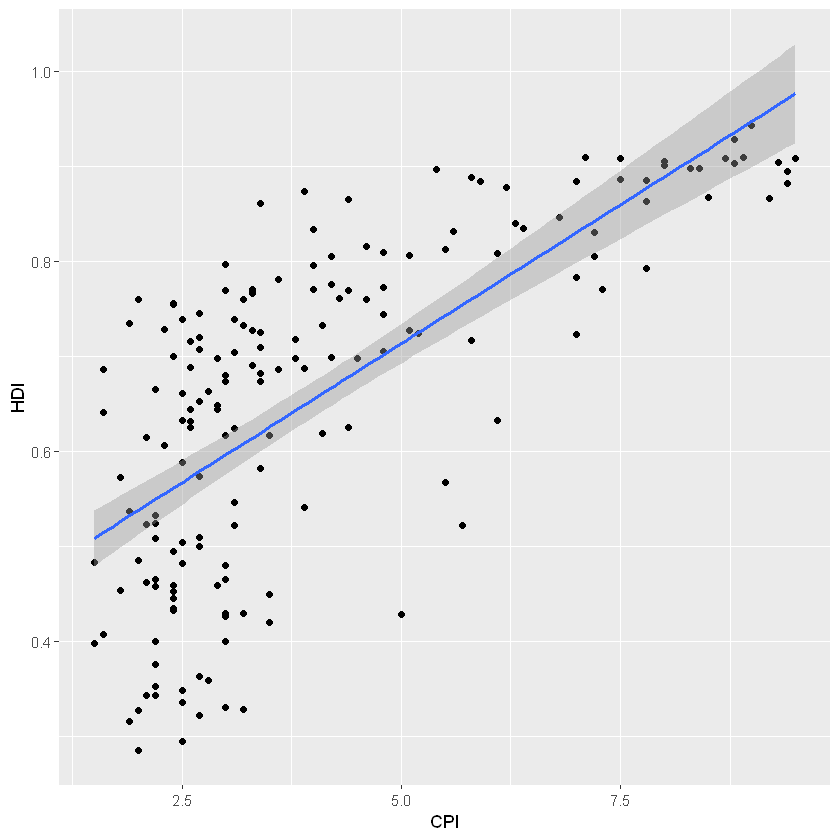

In [27]:
# Overlay a smoothing line on top of the scatter plot using geom_smooth, 
# but use a linear model for the predictions. Hint: see stat_smooth.
ggplot(dat, aes(x=CPI, y=HDI)) + geom_point() + geom_smooth(method = lm)

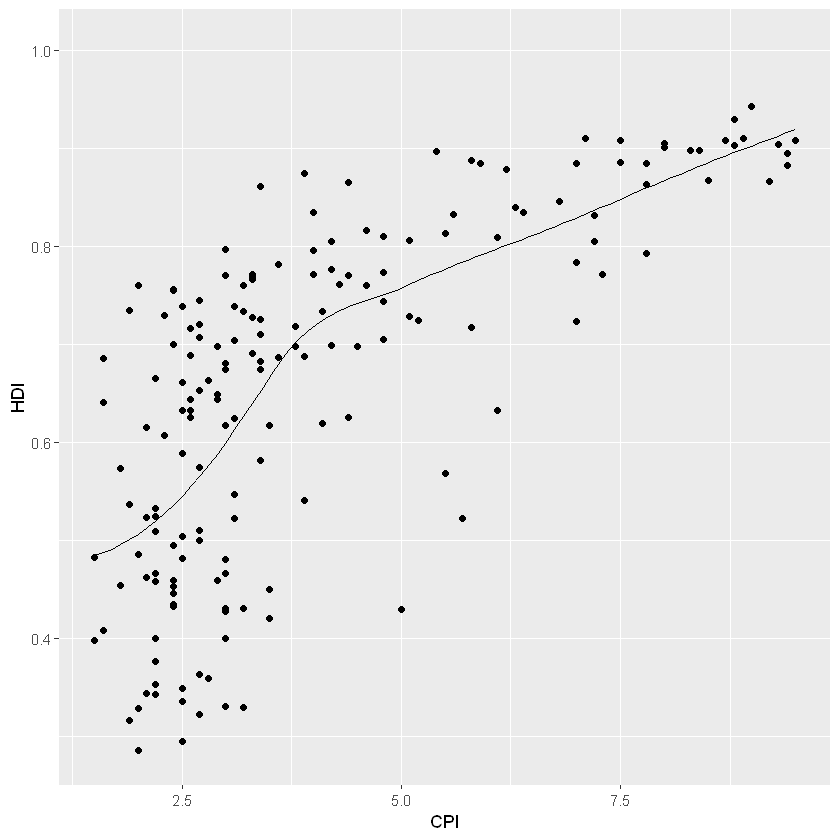

In [31]:
# Overlay a smoothing line on top of the scatter plot using geom_line. 
# Hint: change the statistical transformation
ggplot(dat, aes(x=CPI, y=HDI)) + geom_point() + geom_line(stat= 'smooth', method = 'loess')

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


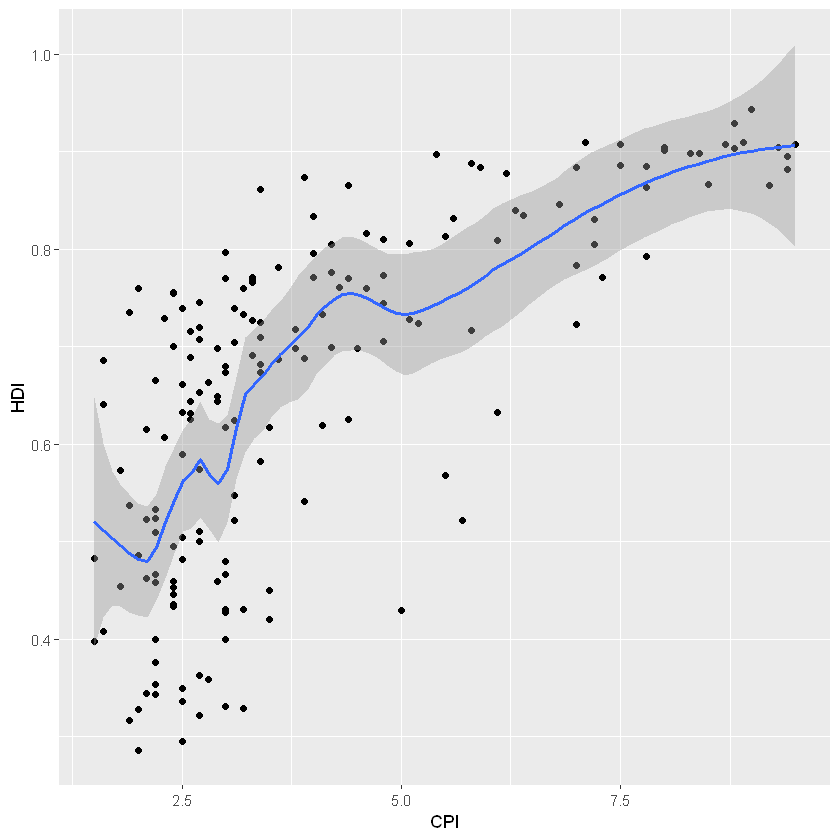

In [35]:
# **BONUS**: Overlay a smoothing line on top of the scatter plot using the
# default loess method, but make it less smooth. Hint: see ?loess
ggplot(dat, aes(x=CPI, y=HDI)) + geom_point() + geom_smooth(span=.3)

### Exercise 3. 

- A. Create a scatter plot with CPI on the x axis and HDI on the y axis. Color the points to indicate region.
- B. Modify the x, y, and color scales so that they have more easily-understood names (e.g., spell out “Human development Index” instead of “HDI”).
- C. Modify the color scale to use specific values of your choosing. Hint: see ```?scale_color_manual```.

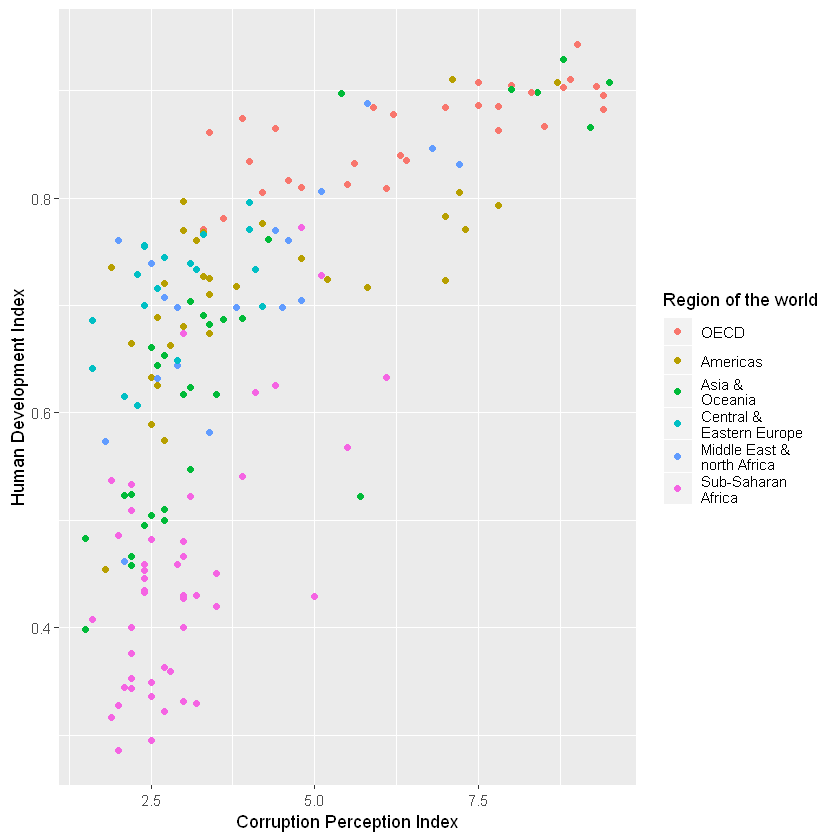

In [37]:
# Create a scatter plot with CPI on the x axis and HDI on the y axis. Color the points to indicate region
ggplot(dat, aes(x=CPI, y=HDI, color=Region)) + geom_point() + scale_x_continuous(name = "Corruption Perception Index") +
scale_y_continuous(name = "Human Development Index") + scale_color_discrete(name = "Region of the world")

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


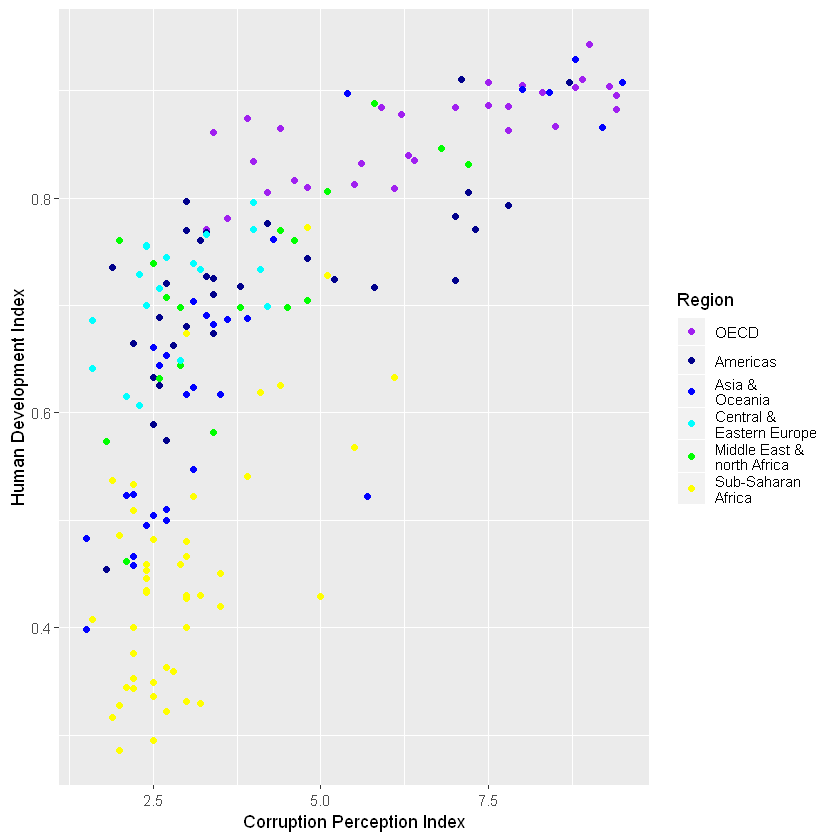

In [44]:
# Modify the color scale to use specific values of your choosing. Hint: see scale_color_manual.
ggplot(dat, aes(x=CPI, y=HDI, color=Region)) + geom_point() + scale_x_continuous(name = "Corruption Perception Index") +
scale_y_continuous(name = "Human Development Index") + scale_color_discrete(name = "Region of the world") +   
scale_colour_manual(values = c("purple", "darkblue", "blue", "cyan", "green", "yellow"))